# Imports

In [1]:
import os
import re
from natsort import natsorted
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle

from py_wake.site._site import UniformSite
from py_wake.site.shear import PowerShear
from py_wake.flow_map import Points

from py_wake.wind_turbines import WindTurbine
from py_wake.wind_turbines.power_ct_functions import PowerCtTabular

from py_wake.wind_farm_models import PropagateDownwind
from py_wake.deficit_models import BastankhahGaussianDeficit
from py_wake.superposition_models import LinearSum

# Turbines and site

In [2]:
po = [0, 0, 0, 0, 0, 0, 0, 49, 97, 183, 268, 369, 470, 580, 722, 
      900, 1103, 1315, 1526, 1705, 1883, 1940, 1980, 1995, 2000, 
      2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 
      2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000] # https://www.thewindpower.net/turbine_en_779_vestas_v100-2000.php
ct = 0.8 * np.ones_like(po)
u = np.linspace(0, len(po), len(po))

turbine = WindTurbine(name = 'Turbines',
                      diameter = 100,
                      hub_height = 100,
                      powerCtFunction = PowerCtTabular(u, po, 'kW', ct))

site = UniformSite(shear=PowerShear(h_ref=turbine.hub_height(), alpha=.1))

n_rows = 1 + 12
n_cols = 1 + 12

D = turbine.diameter()
s = 10 * D

x_grid, y_grid = np.meshgrid(np.arange(n_cols) * s,
                             np.arange(n_rows) * s)

x = x_grid.ravel()
y = y_grid.ravel()

theta_deg = 45
theta_rad = -np.radians(theta_deg)

rotation_matrix = np.array([
    [np.cos(theta_rad), -np.sin(theta_rad)],
    [np.sin(theta_rad),  np.cos(theta_rad)]
])

xy_rotated = rotation_matrix @ np.vstack([x, y])
x, y = xy_rotated[0], xy_rotated[1]

x = x - np.max(x) # Set x=0 at downstream edge
y = y - np.min(y) # Set y=0 at bottommost turbine

padding = 30 # Padding for display [D]
'''
fig, ax = plt.subplots()

# Plot each turbine as a circle with diameter = 1 (in units of D)
for x_t, y_t in zip(x, y):
    circle = Circle((x_t/D, y_t/D), 2, color='black', fill=False)
    ax.add_patch(circle)

# Set padded limits
ax.set_xlim(min(x)/D - padding, max(x)/D + 5*padding)
ax.set_ylim(min(y)/D - padding, max(y)/D + padding)

# Now retrieve actual limits
xlim = ax.get_xlim()
ylim = ax.get_ylim()

tick_interval = 40  # in units of D

# Generate a wide range of ticks
xticks = np.arange(-1000, 1000, tick_interval)
yticks = np.arange(-1000, 1000, tick_interval)

# Clip to axes limits
xticks = xticks[(xticks >= xlim[0]) & (xticks <= xlim[1])]
yticks = yticks[(yticks >= ylim[0]) & (yticks <= ylim[1])]

# Apply ticks
ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xlabel(r"$x\;[D]$")
ax.set_ylabel(r"$y\;[D]$")
ax.set_aspect('equal')
ax.grid(True)
plt.show()'''

<>:72: SyntaxWarning: invalid escape sequence '\;'
<>:72: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Marcin\AppData\Local\Temp\ipykernel_13176\2345029676.py:72: SyntaxWarning: invalid escape sequence '\;'
  ax.set_xlabel(r"$x\;[D]$")


'\nfig, ax = plt.subplots()\n\n# Plot each turbine as a circle with diameter = 1 (in units of D)\nfor x_t, y_t in zip(x, y):\n    circle = Circle((x_t/D, y_t/D), 2, color=\'black\', fill=False)\n    ax.add_patch(circle)\n\n# Set padded limits\nax.set_xlim(min(x)/D - padding, max(x)/D + 5*padding)\nax.set_ylim(min(y)/D - padding, max(y)/D + padding)\n\n# Now retrieve actual limits\nxlim = ax.get_xlim()\nylim = ax.get_ylim()\n\ntick_interval = 40  # in units of D\n\n# Generate a wide range of ticks\nxticks = np.arange(-1000, 1000, tick_interval)\nyticks = np.arange(-1000, 1000, tick_interval)\n\n# Clip to axes limits\nxticks = xticks[(xticks >= xlim[0]) & (xticks <= xlim[1])]\nyticks = yticks[(yticks >= ylim[0]) & (yticks <= ylim[1])]\n\n# Apply ticks\nax.set_xticks(xticks)\nax.set_yticks(yticks)\n\nax.set_xlabel(r"$x\\;[D]$")\nax.set_ylabel(r"$y\\;[D]$")\nax.set_aspect(\'equal\')\nax.grid(True)\nplt.show()'

# Flow map

<>:21: SyntaxWarning: invalid escape sequence '\;'
<>:21: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Marcin\AppData\Local\Temp\ipykernel_13176\2955913416.py:21: SyntaxWarning: invalid escape sequence '\;'
  ax.set_xlabel(r"$x \; [m]$")


'\nsim.flow_map().plot_wake_map(ax=ax, normalize_with=wsp, plot_windturbines=True)\n\nfor x_t, y_t in zip(x, y):\n    circle = Circle((x_t/D, y_t/D), radius=2, color=\'black\', fill=False)\n    ax.add_patch(circle)\n    \nax.set_xlabel(r"$x \\; [m]$")\nax.set_ylabel(r"$y \\; [m]$")\nax.set_aspect(\'equal\')\nax.grid(True)\nplt.tight_layout()\nplt.show()\n'

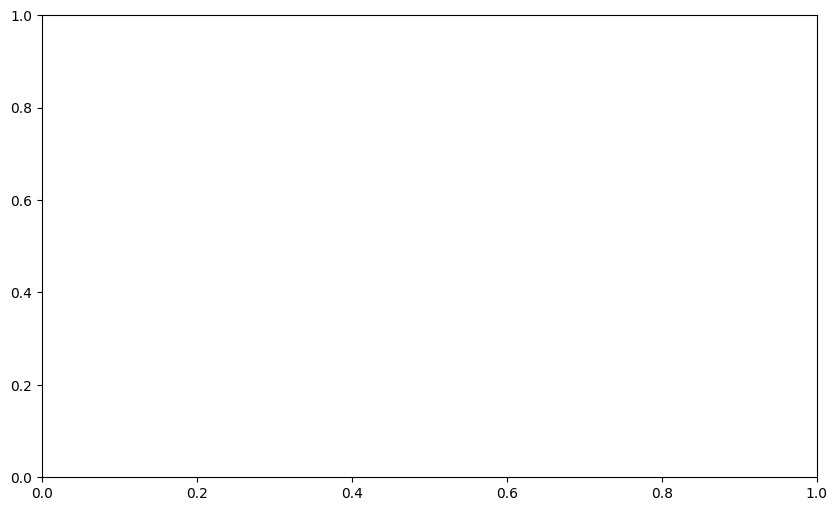

In [3]:
# Run your simulation
wdir = 270  # [deg]
wsp = 10  # [m/s]
ti = 0.1

mpl.rcParams.update(mpl.rcParamsDefault)
fig, ax = plt.subplots(figsize=(10, 6))

wfm = PropagateDownwind(site, turbine,
                        wake_deficitModel=BastankhahGaussianDeficit(use_effective_ws=True),
                        superpositionModel=LinearSum())
sim = wfm(x, y, ws=wsp, wd=wdir, TI=ti) # Skal gange størrelsen op med 10, da PyWake internt skalerer...?

'''
sim.flow_map().plot_wake_map(ax=ax, normalize_with=wsp, plot_windturbines=True)

for x_t, y_t in zip(x, y):
    circle = Circle((x_t/D, y_t/D), radius=2, color='black', fill=False)
    ax.add_patch(circle)
    
ax.set_xlabel(r"$x \; [m]$")
ax.set_ylabel(r"$y \; [m]$")
ax.set_aspect('equal')
ax.grid(True)
plt.tight_layout()
plt.show()
'''

# Load validation data from TDM

In [4]:
validation_data_path = "../ArbitraryLayouts/ValidationData"

# List only files, sorted alphabetically (lex order)
validation_files = natsorted(
    [f for f in os.listdir(validation_data_path) if os.path.isfile(os.path.join(validation_data_path, f))]
)

validation_datasets = {}
for file in validation_files:
    if file.endswith('.csv'):
        file_path = os.path.join(validation_data_path, file)
        validation_datasets[file] = pd.read_csv(file_path)

print("Loaded datasets:", list(validation_datasets.keys()))

Loaded datasets: ['mREC500D.csv', 'mREC1500D.csv']


# Wind speed profiles

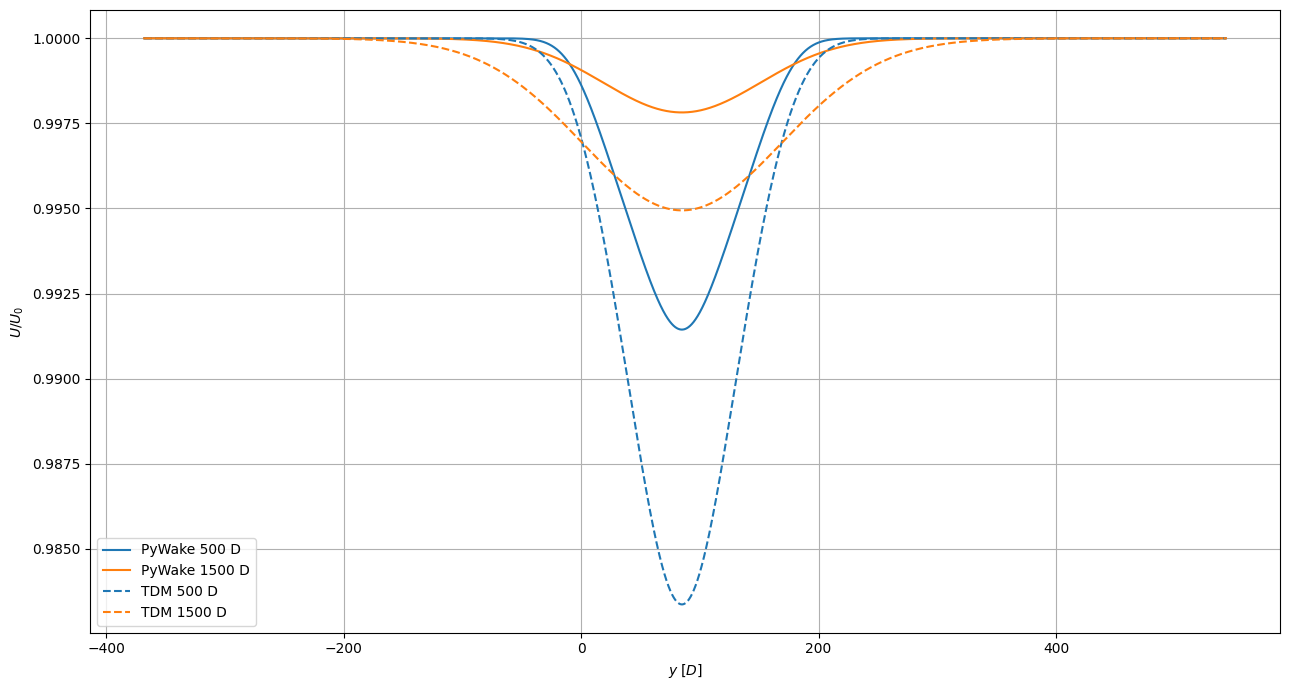

In [5]:
# --- Setup ---
d_downstream = [500, 1500]  # Downstream distances [Park lengths]
m_downstream = [d * D for d in d_downstream]  # [m]

# Determine max length (y_agreed) from all validation datasets
y_agreed = max(len(df) for df in validation_datasets.values())

# Use the longest file to define w_meas
longest_file = max(validation_datasets, key=lambda f: len(validation_datasets[f]))
w_meas = min(validation_datasets[longest_file].iloc[:, 0].values) * D  # Half-width of measurement area [m]

# Define uniform y_range and y_meas
y_range = np.linspace(w_meas, y_agreed + w_meas, y_agreed)
y_meas = np.tile(y_range[:, np.newaxis], (1, len(m_downstream)))  # Shape: (y_agreed, len(m_downstream))
ws_meas = np.zeros_like(y_meas)

# Dictionary to store padded TDM profiles
padded_tdm = {}

# --- Create plot ---
fig, ax = plt.subplots(figsize=(13, 7))
ax.set_xlabel(r'$y \; [D]$')
ax.set_ylabel(r'$ U/U_0 $')
ax.grid(True)

# --- PyWake profiles ---
for i, m in enumerate(m_downstream):
    x_meas = np.full(y_meas.shape[0], max(x) + m)
    ws_meas[:, i] = np.squeeze(
        sim.flow_map(Points(
            x=x_meas,
            y=y_meas[:, i],
            h=turbine.hub_height() * np.ones_like(y_meas[:, i])
        )).WS_eff.values
    )
    ax.plot(y_meas[:, i] / D, ws_meas[:, i] / wsp, label=f'PyWake {d_downstream[i]} D')

# --- TDM (validation) profiles with symmetric padding ---
for i, file in enumerate(validation_files):
    match = re.search(r'(\d+)', file)
    downstream_distance = int(match.group(1)) if match else None

    tdm_data = validation_datasets[file]
    tdm_values = tdm_data.iloc[:, 1].values

    # Symmetric padding
    if len(tdm_values) < y_agreed:
        pad_total = y_agreed - len(tdm_values)
        pad_left = pad_total // 2
        pad_right = pad_total - pad_left
        tdm_values = np.pad(tdm_values, (pad_left, pad_right), constant_values=wsp / 10)

    # Store for integration
    if downstream_distance is not None:
        padded_tdm[downstream_distance] = tdm_values

    # Match to PyWake profile
    if downstream_distance in d_downstream:
        idx = d_downstream.index(downstream_distance)
    else:
        idx = i if i < len(d_downstream) else 0

    color = ax.get_lines()[idx].get_color()
    ax.plot(y_range / D, tdm_values, linestyle='--', color=color, label=f'TDM {downstream_distance} D')

ax.legend()
plt.tight_layout()
plt.show()

# Total wsp deficit integration

In [6]:
rho = 1.225
integrated_m_pywake = {}
integrated_m_tdm = {}

print('------------- INDIVIDUAL MOMENTUM -------------\n')

# PyWake integration
for i, d in enumerate(d_downstream):
    ws_meas_integral = np.trapezoid(ws_meas[:, i], y_range)
    integrated_m_pywake[d] = rho * ws_meas_integral**2
    print(f"PyW integrated momentum at {d} D: {integrated_m_pywake[d]:.0f} kg*m/s")

print('')

# TDM integration
for d in d_downstream:
    if d in padded_tdm:
        tdm_profile = padded_tdm[d] * wsp  # Convert back to m/s
        TDM_speeds_integral = np.trapezoid(tdm_profile, y_range)
        integrated_m_tdm[d] = rho * TDM_speeds_integral**2
        print(f"TDM integrated momentum at {d} D: {integrated_m_tdm[d]:.0f} kg*m/s")
    else:
        print(f"[WARNING] No padded TDM data found for {d} D")

print('\n------------- TOTAL MOMENTUM DEVIATION [%] -------------\n')

# Percent difference
for d in d_downstream:
    if d in integrated_m_tdm:
        pyw = integrated_m_pywake[d]
        tdm = integrated_m_tdm[d]
        percent_diff = 100 * (pyw - tdm) / pyw
        print(f"TDM error at {d} D: {percent_diff:.2f}%")

print('\n------------- MAXIMUM VELOCITY DEVIATION [%] -------------\n')

# Placeholder — to be added if needed

print('\n------------- WAKE WIDTH DEVIATION [%] -------------\n')

# Placeholder — to be added if needed


------------- INDIVIDUAL MOMENTUM -------------

PyW integrated momentum at 500 D: 1015351504526 kg*m/s
PyW integrated momentum at 1500 D: 1016688686706 kg*m/s

TDM integrated momentum at 500 D: 1013270760781 kg*m/s
TDM integrated momentum at 1500 D: 1015095078801 kg*m/s

------------- TOTAL MOMENTUM DEVIATION [%] -------------

TDM error at 500 D: 0.20%
TDM error at 1500 D: 0.16%

------------- MAXIMUM VELOCITY DEVIATION [%] -------------


------------- WAKE WIDTH DEVIATION [%] -------------



# Measurement lines

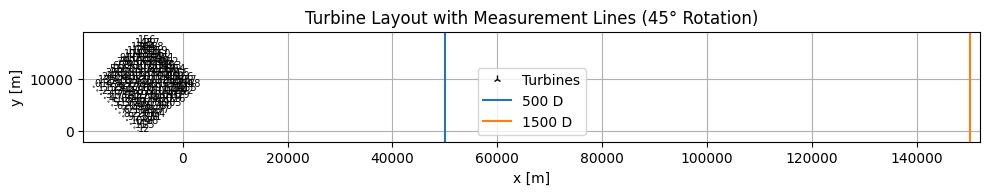

In [7]:
padding = 2000  # Padding for display

fig, ax = plt.subplots(figsize=(10, 6))
turbine.plot(x, y, ax=ax)

# Set plot limits with padding
ax.set_xlim(min(x) - padding, max(x) + max(m_downstream) + padding)
ax.set_ylim(min(y) - padding, max(y) + padding)

# Draw vertical lines at each x_meas (same for all points in a column)
color_map = plt.get_cmap('tab10')
for i, m in enumerate(m_downstream):
    x_line = max(x) + m
    color = color_map(i % 10)
    ax.axvline(x=x_line, color=color, label=f'{d_downstream[i]} D')  # Add label for legend

# Beautify
ax.set_title(f"Turbine Layout with Measurement Lines ({theta_deg}° Rotation)")
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.set_aspect('equal')
ax.grid(True)

# Only show one legend entry per PL
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))  # Remove duplicate labels
ax.legend(unique.values(), unique.keys())

plt.tight_layout()
plt.show()

# Wake min y-coord.

In [8]:
# Define a threshold for wake calculation (e.g., 95% of free-stream wind speed)
threshold = 0.99999 * wsp

# Calculate and print the lowest y-value of the wake for each downstream distance
for i, d in enumerate(d_downstream):
    wake_indices = np.where(ws_meas[:, i] < threshold)[0]
    if len(wake_indices) > 0:
        lowest_y = y_range[wake_indices[0]]
        print(f"Lowest y-value of the wake at {d} D: {lowest_y:.10f} m")
    else:
        print(f"No wake detected at {d} D")

Lowest y-value of the wake at 500 D: -4990.5634704626 m
Lowest y-value of the wake at 1500 D: -12245.6430767653 m
